In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator
from sklearn import preprocessing as preprocess
sns.set()

In [2]:
# I have used my google drive to load the training and testing data
# Upload the dataset file in your google drive and change the path to run the below line
from google.colab import drive
drive.mount('/content/drive')
train_data= pd.read_csv('/content/drive/MyDrive/ML/proj1btrainingdatacsv.csv',dtype='object')
print(train_data)
test_data = pd.read_csv('/content/drive/MyDrive/ML/testdatapro.csv',dtype='object')
print(test_data)

Mounted at /content/drive
             x                    y
0     -1.8595     -2.9157602212752 
1     -0.4045      1.5789283980163 
2      2.4085      11.132203673407 
3      -1.764     -2.4681520321457 
4       0.274      3.9107990113579 
..         ...                  ...
120    0.3105      4.2639106552876 
121    1.4255      8.1198814216973 
122   -1.0735    -0.54575209222805 
123     1.385      8.0268599849653 
124    0.5895      4.5934941677497 

[125 rows x 2 columns]
           x                    y
0    1.0325       6.433549694318 
1     1.834      9.2062880907779 
2     0.234      3.9342062536621 
3    2.3835      11.071626087497 
4      2.13      10.541827976763 
5    -1.032    0.073624941709515 
6   -1.1745    -0.80295434834512 
7   -2.9385      -6.414904719213 
8     2.008      9.3439320861606 
9     0.828      5.8368037411017 


In [3]:
x_train = train_data.iloc[:,0]
y_train = train_data.iloc[:,1]

y_train=y_train.astype('float64')
x_train=x_train.astype('float64')

x_test = test_data.iloc[:,0]
y_test = test_data.iloc[:,1]

y_test=y_test.astype('float64')
x_test=x_test.astype('float64')

In [4]:
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values

2a. Implementing the locally weighted Linear Regression

In [5]:
x = np.zeros((len(x_train), 2))
x[:, 0] = 1
x[:, 1] = x_train
r = 0.25

In [6]:
# Implementing the function to calculate the weights value
# the formula given in the question
def Calculate_weights(point_x, all_x, r):
    m = all_x.shape[0]
    #print(m)
    weights = np.mat(np.eye((m)))
    for i in range(m):
        difference = point_x - all_x[i]
        weights[i,i] = np.exp(difference*difference.T/(-2.0*r**2))
    return weights

In [7]:
# Calculating the theta value 
# formula used is theta =( x transpose * weights * x ) inverse * (x transpose * weights * output_training data )
def Calculate_theta(w, x, x_train_d, y_train_d):
    v1 = np.dot(x.T, w)
    v2 = np.dot(v1, x)
    v3 = np.linalg.inv(v2)
    v4 = np.dot(v1, y_train_d)
    theta = np.dot(v4,v3)
    return theta

In [8]:
# to predict we are using the h(x) = theta * x
def locally_weighted_linear_regression(x, x_train_data, y_train_data, r):
    y_pred = np.zeros(len(x))
    for i in range(len(x)):
        w_value = Calculate_weights(x_train_data[i], x_train_data, r)
        theta_value = Calculate_theta(w_value, x, x_train_data, y_train_data)
        y_pred[i] = np.dot(theta_value, x[i])
    return y_pred, w_value, theta_value

In [9]:
# error value is defined as sum of all(y_pred - y_train) * weights
def error(y_train_value, y_pred_value, weight):
    error = (np.sum(((y_pred_value - y_train_value)**2) * weight))/2
    return error

2b. Applying the locally weighted linear regression for the given training data and plotting the graph

In [10]:
y_prediction, w_value, thet= locally_weighted_linear_regression(x, x_train, y_train, r)
print(y_prediction)
error= error(y_train,y_prediction, w_value )
print (error)

[-2.7665977   1.81045378 11.04849009 -2.43300934  4.13194477  8.29674693
  1.71502173  9.51208759  5.04856034  4.97988499 10.81407908  8.05200009
 -2.53131916  4.58977622 -2.71361037  0.4285654  -0.84773913  8.64393201
 12.29644753 -3.00501867  4.58836078  8.17753257  3.26250561  5.93866455
 -5.84045102  3.70256698  4.80142047  9.2058171  -2.42787578  2.84637012
  6.09538455  3.51085377 10.8621877  -6.28405676  0.7005796   9.72014313
 -5.05215966 11.54088215  7.07780396 -5.6542591  -0.47397978  9.34931306
  9.64696597  0.12485387  4.35612761 11.77440288 -1.15418459  1.81205726
  9.14338988  1.56057915 10.52884313  4.99269217  8.50210728 -5.1845436
  3.57540121 -1.88218058 -0.94137035 10.97675652  9.00612516 -3.22238683
 -2.7030257   5.61058681  9.73728658 -2.38866395  0.4079769  11.80387221
  0.49314827  3.18632585 -3.14194555  8.26177802 11.25064342 -2.25271964
  6.56389704  0.32191035  7.08161307 -5.94124548  2.73243577  1.3773315
 10.22721022 -1.33289306  6.36125662  1.11756026  5.0

In [11]:
thet

matrix([[3.36120283, 2.84770227]])

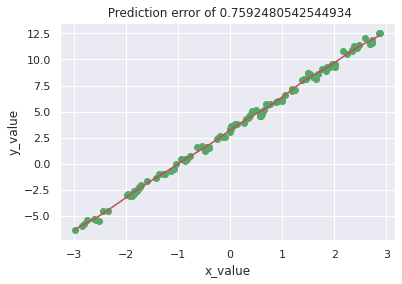

In [12]:
plt.scatter(x_train, y_train, color='g')
axis = operator.itemgetter(0)
axis_zip = sorted(zip(x_train,y_prediction), key=axis)
x_train, y_pred1 = zip(*axis_zip)
plt.plot(x_train, y_pred1, color='r')
plt.xlabel('x_value')
plt.ylabel('y_value')
plt.title(f' Prediction error of {error}')
plt.show()

2c. Applying the test data to the locally weighted linear regression and comparing with 1c.

In [13]:
# I have used my google drive to load the training and testing data
# Upload the dataset file in your google drive and change the path to run the below line
test_data = pd.read_csv('/content/drive/MyDrive/ML/testdatapro.csv',dtype='object')
print(test_data)

x_test = test_data.iloc[:,0]
y_test = test_data.iloc[:,1]

y_test=y_test.astype('float64')
x_test=x_test.astype('float64')

x_test = x_test.values
y_test = y_test.values

           x                    y
0    1.0325       6.433549694318 
1     1.834      9.2062880907779 
2     0.234      3.9342062536621 
3    2.3835      11.071626087497 
4      2.13      10.541827976763 
5    -1.032    0.073624941709515 
6   -1.1745    -0.80295434834512 
7   -2.9385      -6.414904719213 
8     2.008      9.3439320861606 
9     0.828      5.8368037411017 


In [14]:
new_x = np.zeros((len(test_data), 2))
new_x[:, 0] = 1
new_x[:, 1] = x_test

In [15]:
thet.shape

(1, 2)

In [16]:
def Calculate_weights_test(point_x, all_x, r, trainy,y_,m):
    last_error =0
    for i in range(m):
        difference = ( all_x[i] - point_x )
        weights = np.exp(difference*difference/(-2.0*r**2))
        diff1 =( y_ - trainy[i])
        weigh = diff1 * weights
        last_error += weigh
    return last_error

In [17]:
def locally_weighted_linear_regression_test(theta, x_, testx,trainx,trainy):
  last_error =0
  y_pred = np.zeros(len(testx))
  for i in range(len(testx)):
    y_pred[i] = np.dot(theta, x_[i])
    mean= np.mean(trainx)
    difference = (mean - testx[i] )
    weights = np.exp(difference*difference/(-2.0*r**2))
    diff1 =( y_pred[i] - trainy[i])
    weigh = diff1 * weights
    last_error += weigh
  return y_pred, last_error

In [18]:
y_prediction_test,error = locally_weighted_linear_regression_test(thet, new_x, x_test,x_train,y_test)
print(error)
print(y_prediction_test)
print(y_test)

0.08356348493528484
[ 6.30145542  8.58388879  4.02756516 10.14870119  9.42680866  0.42237409
  0.01657651 -5.00677029  9.07938899  5.71910031]
[ 6.43354969  9.20628809  3.93420625 11.07162609 10.54182798  0.07362494
 -0.80295435 -6.41490472  9.34393209  5.83680374]


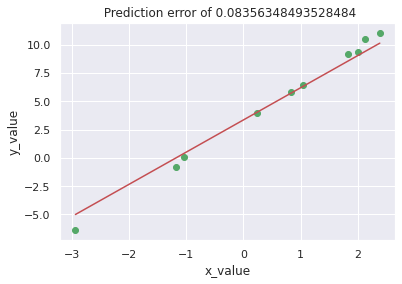

In [19]:
plt.scatter(x_test, y_test, color='g')
axis = operator.itemgetter(0)
axis_zip = sorted(zip(x_test,y_prediction_test), key=axis)
x_test, y_pred2 = zip(*axis_zip)
plt.plot(x_test, y_pred2, color='r')
plt.xlabel('x_value')
plt.ylabel('y_value')
plt.title(f' Prediction error of {error}')
plt.show()

Comparing the linear regression with locally weighted linear regression, The linear regression has less error compared to locally weighted linear regression. 

Hence the performance of linear regression is much better than the locally weighted linear regression

2d. Using only the first 20 elements of the training dataset to evaluate the performance

In [20]:
# I have used my google drive to load the training and testing data
# Upload the dataset file in your google drive and change the path to run the below line
train_data1= pd.read_csv('/content/drive/MyDrive/ML/proj1btrainingdatacsv.csv',dtype='object')
x_train_value = train_data1.iloc[:,0]
y_train_value = train_data1.iloc[:,1]
y_train_value = y_train_value.astype('float64')
x_train_value = x_train_value.astype('float64')
x_train_few = x_train_value.values[0:20]
y_train_few = y_train_value.values[0:20]
print(y_train_few.shape)

(20,)


In [21]:
x1 = np.zeros((len(x_train_few), 2))
x1[:, 0] = 1
x1[:, 1] = x_train_few
print(x1.shape)

(20, 2)


In [22]:
y_prediction_few, w_value_few , theta_few= locally_weighted_linear_regression(x1, x_train_few, y_train_few, r)
error_few = (np.sum(((y_prediction_few- y_train_few)**2) * w_value_few))/2
print (error_few)

0.005779828337252765


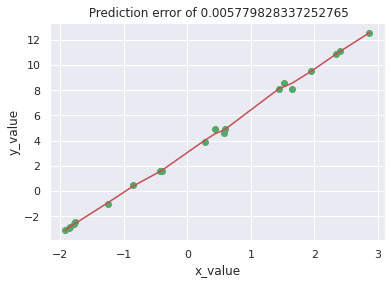

In [23]:
plt.scatter(x_train_few, y_train_few, color='g')
axis = operator.itemgetter(0)
axis_zip = sorted(zip(x_train_few,y_prediction_few), key=axis)
x_train_few, y_prediction_few = zip(*axis_zip)
plt.plot(x_train_few, y_prediction_few, color='r')
plt.xlabel('x_value')
plt.ylabel('y_value')
plt.title(f' Prediction error of {error_few}')
plt.show()

In [24]:
test_data = pd.read_csv('/content/drive/MyDrive/ML/testdatapro.csv',dtype='object')
print(test_data)

x_test = test_data.iloc[:,0]
y_test = test_data.iloc[:,1]

y_test=y_test.astype('float64')
x_test=x_test.astype('float64')

x_test = x_test.values
y_test = y_test.values

           x                    y
0    1.0325       6.433549694318 
1     1.834      9.2062880907779 
2     0.234      3.9342062536621 
3    2.3835      11.071626087497 
4      2.13      10.541827976763 
5    -1.032    0.073624941709515 
6   -1.1745    -0.80295434834512 
7   -2.9385      -6.414904719213 
8     2.008      9.3439320861606 
9     0.828      5.8368037411017 


In [25]:
new_x = np.zeros((len(test_data), 2))
new_x[:, 0] = 1
new_x[:, 1] = x_test

In [26]:
y_test

array([ 6.43354969,  9.20628809,  3.93420625, 11.07162609, 10.54182798,
        0.07362494, -0.80295435, -6.41490472,  9.34393209,  5.83680374])

In [27]:
y_prediction_test, error_few = locally_weighted_linear_regression_test(theta_few, new_x, x_test, x_train_few,y_test)
print (error_few)
print(y_prediction_test)

0.5985416822021258
[ 7.32280105 10.15091424  4.50527344 12.08983901 11.19535779  0.03816016
 -0.46465473 -6.68897371 10.76487768  6.60121759]


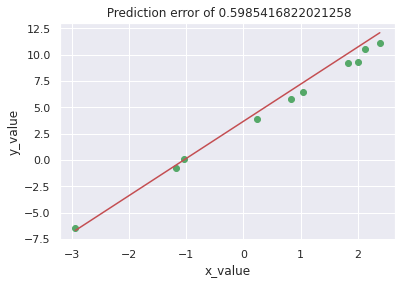

In [28]:
plt.scatter(x_test, y_test, color='g')
axis = operator.itemgetter(0)
axis_zip = sorted(zip(x_test,y_prediction_test), key=axis)
x_test, y_pred2 = zip(*axis_zip)
plt.plot(x_test, y_pred2, color='r')
plt.xlabel('x_value')
plt.ylabel('y_value')
plt.title(f' Prediction error of {error_few}')
plt.show()

The error produce when testing by training using only first 20 training points is higher than the error produced when we used all the training data points, this is because the algorithm got very limited number of points to train and the weight matrix updation depends on the amount of training data we pass to the algorithm. 
Hence training algorithm using all data points produced better results.

2e) I think it was dervied from the function which was used in the 1c because the error produced while training and testing the dataset was comparetively less.

Based on the testset graph produced by linear regression in 1c, the line is linear and with less amount of error for functional depth 3

the testset graph produced by the locally weighted linear regression has more error compared to the linear regression

hence the function used in linear regression gives better dataset derivation from the function format.